# MediaPipeによるスケルトン(人間の骨格特徴)の自動抽出・トラッキング
- https://mediapipe.dev/

## 画像ファイルからスケルトン(人間の骨格特徴)を取り出す

In [1]:
# 初期設定
import mediapipe as mp
mp_holistic = mp.solutions.holistic

# Initialize MediaPipe Holistic.
holistic = mp_holistic.Holistic(
    static_image_mode=True, min_detection_confidence=0.5)

# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

I0000 00:00:1744965735.778294 2080813 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


W0000 00:00:1744965735.981696 2081041 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744965735.999290 2081041 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744965736.004456 2081039 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744965736.004495 2081037 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744965736.006901 2081036 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744965736.020895 2081040 inference_feedback_manager.cc:114] Feedback manager 

In [2]:
# 画像の指定
# 元画像
input_imgpath = 'takafuminakanishi.jpg'

# スケルトン付き画像保存先
output_imgpath = 'takafuminakanishi_with_skeleton.jpg'

In [3]:
import cv2
import numpy as np

image = cv2.imread(input_imgpath)
img_RGB=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Convert the BGR image to RGB and process it with MediaPipe Pose.
results = holistic.process(img_RGB)

# Draw pose landmarks.
annotated_image = image.copy()
mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
mp_drawing.draw_landmarks(
      image=annotated_image,
      landmark_list=results.face_landmarks,
      connections=mp_holistic.FACEMESH_TESSELATION,
      landmark_drawing_spec=drawing_spec,
      connection_drawing_spec=drawing_spec)
mp_drawing.draw_landmarks(
      image=annotated_image,
      landmark_list=results.pose_landmarks,
      connections=mp_holistic.POSE_CONNECTIONS,
      landmark_drawing_spec=drawing_spec,
      connection_drawing_spec=drawing_spec)
cv2.imwrite(output_imgpath, annotated_image)

W0000 00:00:1744965738.311625 2081036 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


True

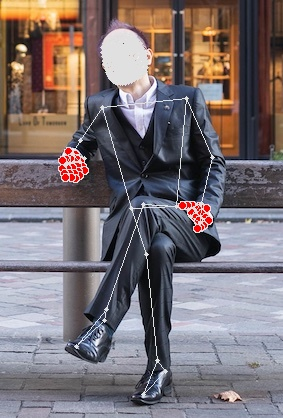

In [4]:
# スケルトン付き画像表示
from IPython.display import Image
Image(output_imgpath, format='jpg')

In [5]:
# 画像から21個の3D左手ランドマークを抽出
len(results.left_hand_landmarks.landmark)

21

In [6]:
results.left_hand_landmarks.landmark

[x: 0.730913043
y: 0.498036504
z: 1.7786167e-09
, x: 0.706426501
y: 0.492888063
z: -0.00531250332
, x: 0.681437612
y: 0.491585225
z: -0.0125910714
, x: 0.661909103
y: 0.491524279
z: -0.0202521104
, x: 0.644385755
y: 0.490449518
z: -0.0278246831
, x: 0.697413862
y: 0.499589652
z: -0.0133695835
, x: 0.681529224
y: 0.507024586
z: -0.0219921712
, x: 0.677916408
y: 0.508536696
z: -0.0263177212
, x: 0.677913249
y: 0.508972645
z: -0.0278134607
, x: 0.712508321
y: 0.510097325
z: -0.0138274701
, x: 0.692327261
y: 0.519484699
z: -0.0194183905
, x: 0.689691544
y: 0.521046817
z: -0.0201611761
, x: 0.691062689
y: 0.520455301
z: -0.0207721293
, x: 0.725314
y: 0.519539654
z: -0.0144480346
, x: 0.706838787
y: 0.529523492
z: -0.0192553867
, x: 0.702913225
y: 0.52992928
z: -0.0191947091
, x: 0.702487826
y: 0.528698742
z: -0.0186738595
, x: 0.735352278
y: 0.527803779
z: -0.0154068824
, x: 0.719968379
y: 0.53915447
z: -0.0176980756
, x: 0.708102763
y: 0.54393971
z: -0.0166994166
, x: 0.698158145
y: 0.5457

In [7]:
results.left_hand_landmarks.landmark[0].x

0.7309130430221558

In [8]:
# 画像から21個の3D右手ランドマークを抽出
len(results.right_hand_landmarks.landmark)

21

In [9]:
results.right_hand_landmarks.landmark

[x: 0.243210405
y: 0.363233924
z: 4.66584549e-09
, x: 0.266316384
y: 0.368824303
z: -0.00822389405
, x: 0.283683
y: 0.383323431
z: -0.014968127
, x: 0.290323049
y: 0.397235096
z: -0.0198383834
, x: 0.297778606
y: 0.408801436
z: -0.0247909632
, x: 0.268578589
y: 0.378896087
z: -0.0264427867
, x: 0.274591863
y: 0.39674595
z: -0.0376555361
, x: 0.278037786
y: 0.409332931
z: -0.0425079241
, x: 0.279937029
y: 0.419675738
z: -0.045113571
, x: 0.250357836
y: 0.379639208
z: -0.0274491068
, x: 0.257843703
y: 0.400075763
z: -0.0379605889
, x: 0.263349444
y: 0.414517939
z: -0.0417304561
, x: 0.267831475
y: 0.426471323
z: -0.0444559306
, x: 0.234293714
y: 0.381144851
z: -0.0281964652
, x: 0.239912048
y: 0.402485728
z: -0.0386504158
, x: 0.245078489
y: 0.415586889
z: -0.0420159735
, x: 0.251618057
y: 0.425538272
z: -0.043241296
, x: 0.219779491
y: 0.383474231
z: -0.0289836805
, x: 0.222347707
y: 0.40221104
z: -0.0386914872
, x: 0.226306885
y: 0.414630115
z: -0.0423100516
, x: 0.232052833
y: 0.42444

In [10]:
# 画像から468個の3D顔ランドマークを抽出
len(results.face_landmarks.landmark)

468

In [11]:
results.face_landmarks.landmark

[x: 0.435513496
y: 0.15732336
z: -0.0237120371
, x: 0.427241057
y: 0.142391562
z: -0.0313115828
, x: 0.431939423
y: 0.148700789
z: -0.0198049154
, x: 0.418351024
y: 0.130437553
z: -0.0174415018
, x: 0.425074488
y: 0.137657702
z: -0.0317675918
, x: 0.423417628
y: 0.132424623
z: -0.0273973644
, x: 0.420648843
y: 0.121021941
z: -0.00585601293
, x: 0.38548696
y: 0.133087203
z: 0.022650186
, x: 0.417478621
y: 0.111724228
z: 0.00235662609
, x: 0.414915502
y: 0.105771743
z: 0.00404707296
, x: 0.407350421
y: 0.085393548
z: 0.0199342296
, x: 0.436497182
y: 0.159386605
z: -0.0236648489
, x: 0.437519819
y: 0.161218569
z: -0.0223959908
, x: 0.438244075
y: 0.162097737
z: -0.0203957967
, x: 0.438217342
y: 0.162871063
z: -0.0214044675
, x: 0.43848303
y: 0.164076045
z: -0.0230724439
, x: 0.439173669
y: 0.165988073
z: -0.0255024042
, x: 0.440288097
y: 0.168563798
z: -0.0264434498
, x: 0.443483174
y: 0.174770907
z: -0.0237984098
, x: 0.429191
y: 0.145346165
z: -0.0292081144
, x: 0.425607085
y: 0.1471939

In [12]:
# 画像から33個の3D全身ランドマークを抽出
len(results.pose_landmarks.landmark)

33

In [13]:
results.pose_landmarks.landmark

[x: 0.4315404
y: 0.148496971
z: -0.262123466
visibility: 0.999999762
, x: 0.447054118
y: 0.127352148
z: -0.22060512
visibility: 0.999999523
, x: 0.46092549
y: 0.125656813
z: -0.22041516
visibility: 0.999999642
, x: 0.473751813
y: 0.124306493
z: -0.220428243
visibility: 0.999999642
, x: 0.41481334
y: 0.133139253
z: -0.202919066
visibility: 0.999999404
, x: 0.405307174
y: 0.135480583
z: -0.202993602
visibility: 0.999999404
, x: 0.398109049
y: 0.137739524
z: -0.203115672
visibility: 0.999999404
, x: 0.501187742
y: 0.135382473
z: 0.0178519841
visibility: 0.999999523
, x: 0.39946419
y: 0.151384369
z: 0.0921323374
visibility: 0.999997735
, x: 0.467303753
y: 0.168667167
z: -0.174629942
visibility: 0.999999881
, x: 0.421763629
y: 0.174393043
z: -0.153265253
visibility: 0.999999642
, x: 0.659386039
y: 0.235728338
z: 0.0922154188
visibility: 0.999985814
, x: 0.362087309
y: 0.256056935
z: 0.202504992
visibility: 0.999976873
, x: 0.752381384
y: 0.375704825
z: -0.0114926202
visibility: 0.99460417
,

## とにかくスケルトン付きのgifファイルを作る

In [14]:
# 初期設定
import mediapipe as mp
mp_holistic = mp.solutions.holistic

# Initialize MediaPipe Holistic.
holistic = mp_holistic.Holistic(
    static_image_mode=True, min_detection_confidence=0.5)

# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

I0000 00:00:1744965751.994774 2080813 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1


W0000 00:00:1744965752.095273 2081411 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744965752.110836 2081411 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744965752.113525 2081416 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744965752.113679 2081412 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744965752.113922 2081411 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744965752.119721 2081413 inference_feedback_manager.cc:114] Feedback manager 

In [15]:
# ビデオの指定
videopath = 'testmovie.m4v'

In [16]:
# ビデオから１フレームごとの画像を展開するフォルダ
TMPFILEPATH='tmpimages/'

In [17]:
# video2images
import os
import shutil
import cv2

def video_2_images(video_file):

  tmpfilepath=TMPFILEPATH
  print(tmpfilepath)
  image_file='img_%s.png'
  # 既にimagesフォルダーがあれば削除
  if os.path.isdir(tmpfilepath):
    shutil.rmtree(tmpfilepath)

  os.makedirs(tmpfilepath, exist_ok=True)
  print(os.path.isdir(tmpfilepath))

  # Initial setting
  i = 0
  interval = 3
  length = 300

  cap = cv2.VideoCapture(video_file)
  while(cap.isOpened()):
    flag, frame = cap.read()
    if flag == False:
      break
    if i == length*interval:
      break
    if i % interval == 0:
      cv2.imwrite(tmpfilepath+image_file % str(i).zfill(6), frame)
    i += 1
  cap.release()

In [18]:
video_2_images(videopath)

tmpimages/
True


In [19]:
import cv2
import numpy as np
import glob

# image file names to files in list format
files=[]
for name in sorted(glob.glob(TMPFILEPATH+'*.png')):
    files.append(name)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in files}

for name, image in images.items():
  # Convert the BGR image to RGB and process it with MediaPipe Pose.
  results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  # Draw pose landmarks.
  annotated_image = image.copy()
  mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
  mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
  mp_drawing.draw_landmarks(
      image=annotated_image,
      landmark_list=results.face_landmarks,
      connections=mp_holistic.FACEMESH_TESSELATION,
      landmark_drawing_spec=drawing_spec,
      connection_drawing_spec=drawing_spec)
  mp_drawing.draw_landmarks(
      image=annotated_image,
      landmark_list=results.pose_landmarks,
      connections=mp_holistic.POSE_CONNECTIONS,
      landmark_drawing_spec=drawing_spec,
      connection_drawing_spec=drawing_spec)
  cv2.imwrite(name, annotated_image)

In [20]:
# images2gif
from PIL import Image
import glob

outgif='out.gif'

files = sorted(glob.glob(TMPFILEPATH+'*.png'))
images = list(map(lambda file: Image.open(file), files))
images[0].save(outgif, save_all=True,
               append_images=images[1:],
               duration=100, loop=0)

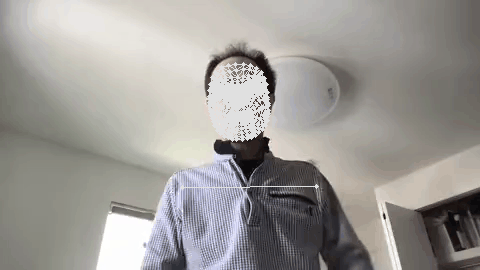

In [21]:
# display gif
from IPython.display import Image
Image(outgif, format='png')

# もっと簡単な書き方

In [22]:
import cv2
import mediapipe as mp
import csv

# MediaPipe の各種ユーティリティ
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

def process_video(input_video_path, output_video_path, csv_path):
    """
    input_video_path: 入力動画ファイルのパス
    output_video_path: スケルトン描画後の動画ファイル出力パス
    csv_path: ランドマークデータを保存する CSV ファイルパス
    """

    # ----- 1) 動画ファイルの読み込み -----
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print(f"動画を開けませんでした: {input_video_path}")
        return

    # 動画情報の取得
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps    = cap.get(cv2.CAP_PROP_FPS)

    # ----- 2) 出力動画ファイルの設定 -----
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # mp4出力用
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    # ----- 3) CSVファイルを開き、ヘッダを書き込む -----
    # ここでは frame, type(顔/ポーズ/手など), landmark_index, x, y, z, visibility の例
    csv_file = open(csv_path, 'w', newline='')
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['frame', 'landmark_type', 'index', 'x', 'y', 'z', 'visibility'])

    # ----- 4) MediaPipe Holistic のインスタンスを作成 -----
    with mp_holistic.Holistic(
        static_image_mode=False,
        model_complexity=1,
        smooth_landmarks=True,
        enable_segmentation=False,
        smooth_segmentation=True,
        refine_face_landmarks=True
    ) as holistic:

        frame_idx = 0  # フレーム番号

        while True:
            ret, frame = cap.read()
            if not ret:
                break  # 動画を最後まで読み込んだので終了

            # BGR -> RGB 変換
            img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # ----- 5) フレームを Holistic で推論 -----
            results = holistic.process(img_rgb)

            # ----- 6) ランドマーク情報を CSV に書き込み -----
            # 顔 (face_landmarks)
            if results.face_landmarks is not None:
                for idx, landmark in enumerate(results.face_landmarks.landmark):
                    csv_writer.writerow([
                        frame_idx,
                        'face',
                        idx,
                        landmark.x,
                        landmark.y,
                        landmark.z,
                        landmark.visibility
                    ])

            # ポーズ (pose_landmarks)
            if results.pose_landmarks is not None:
                for idx, landmark in enumerate(results.pose_landmarks.landmark):
                    csv_writer.writerow([
                        frame_idx,
                        'pose',
                        idx,
                        landmark.x,
                        landmark.y,
                        landmark.z,
                        landmark.visibility
                    ])

            # 左手 (left_hand_landmarks)
            if results.left_hand_landmarks is not None:
                for idx, landmark in enumerate(results.left_hand_landmarks.landmark):
                    csv_writer.writerow([
                        frame_idx,
                        'left_hand',
                        idx,
                        landmark.x,
                        landmark.y,
                        landmark.z,
                        landmark.visibility
                    ])

            # 右手 (right_hand_landmarks)
            if results.right_hand_landmarks is not None:
                for idx, landmark in enumerate(results.right_hand_landmarks.landmark):
                    csv_writer.writerow([
                        frame_idx,
                        'right_hand',
                        idx,
                        landmark.x,
                        landmark.y,
                        landmark.z,
                        landmark.visibility
                    ])

            # ----- 7) スケルトン描画 -----
            annotated_frame = frame.copy()

            # 顔
            if results.face_landmarks:
                mp_drawing.draw_landmarks(
                    image=annotated_frame,
                    landmark_list=results.face_landmarks,
                    connections=mp_holistic.FACEMESH_TESSELATION,  # 複数あるがテッセレーションなどを例示
                    landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                    connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,256,121), thickness=1)
                )

            # ポーズ
            if results.pose_landmarks:
                mp_drawing.draw_landmarks(
                    image=annotated_frame,
                    landmark_list=results.pose_landmarks,
                    connections=mp_holistic.POSE_CONNECTIONS,
                    landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                    connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,44,121), thickness=2)
                )

            # 左手
            if results.left_hand_landmarks:
                mp_drawing.draw_landmarks(
                    image=annotated_frame,
                    landmark_list=results.left_hand_landmarks,
                    connections=mp_holistic.HAND_CONNECTIONS,
                    landmark_drawing_spec=mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                    connection_drawing_spec=mp_drawing.DrawingSpec(color=(121,44,250), thickness=2)
                )

            # 右手
            if results.right_hand_landmarks:
                mp_drawing.draw_landmarks(
                    image=annotated_frame,
                    landmark_list=results.right_hand_landmarks,
                    connections=mp_holistic.HAND_CONNECTIONS,
                    landmark_drawing_spec=mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                    connection_drawing_spec=mp_drawing.DrawingSpec(color=(245,66,230), thickness=2)
                )

            # ----- 8) フレームを動画として書き出し -----
            out.write(annotated_frame)

            frame_idx += 1  # 次のフレームへ

        # Holistic インスタンス終了
    # CSVファイルを閉じる
    csv_file.close()
    # キャプチャと動画ライターを閉じる
    cap.release()
    out.release()
    print("処理が完了しました。")

# -----------------------------
#  実行例 (Colab またはローカル)
# -----------------------------
input_video_path = 'testmovie.m4v'   # 入力動画
output_video_path = 'resultmovie.mp4' # スケルトン付き出力動画
csv_path = 'landmark.csv'              # ランドマークCSV

process_video(input_video_path, output_video_path, csv_path)


I0000 00:00:1744965766.507406 2080813 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1744965766.598756 2081843 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744965766.613658 2081838 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744965766.616476 2081838 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744965766.616528 2081844 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744965766.617263 2081845 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

処理が完了しました。


- resultmovie.mp4とlandmark.csvが生成されているはず

# ジャンケン(グー(👊)、チョキ(✌️)、パー（✋）)を認識する機能を実現

- [注意]なるべくシンプルになるようにプログラムしているので、両手が写ると不具合があるかもしれません。データを作成する際は、右手のみ写るように写真を準備してください。

## 手のLandmarkを取得する


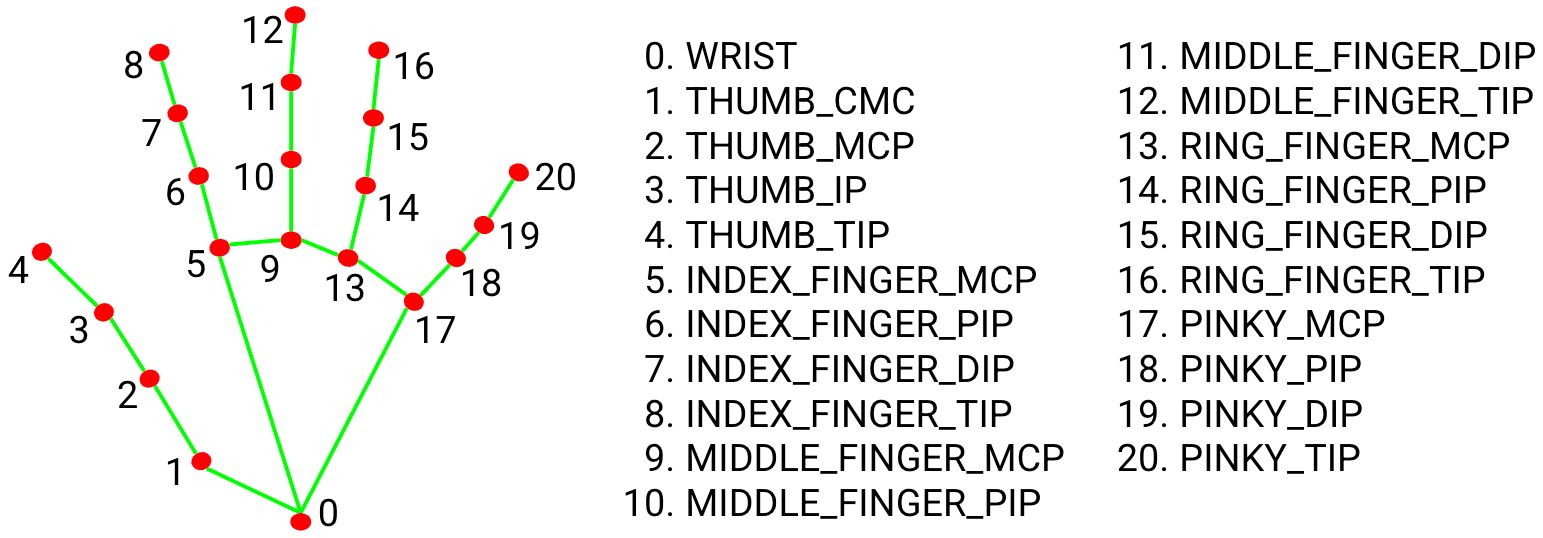

- https://google.github.io/mediapipe/solutions/hands.html より

In [23]:
import cv2
import mediapipe as mp

input_filename='papar.jpg'
output_filename='tmp.jpg'

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
holistic=mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5)


image = cv2.imread(input_filename)
# 処理する前にBGR画像をRGBに変換
result = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

image_height, image_width, _ = image.shape
annotated_image = image.copy()
mp_drawing.draw_landmarks(annotated_image, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
cv2.imwrite(output_filename, annotated_image)

I0000 00:00:1744965781.908833 2080813 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1744965782.065794 2082304 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744965782.083444 2082304 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744965782.094282 2082303 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744965782.094350 2082298 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744965782.103309 2082299 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

True

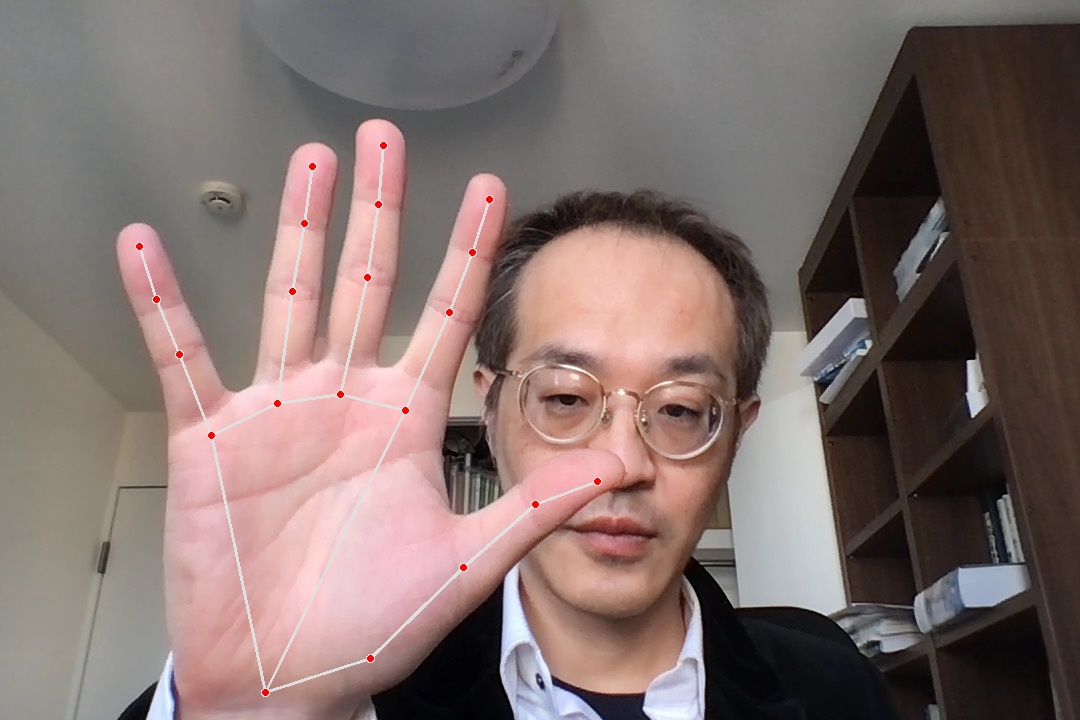

In [24]:
# スケルトン付き画像表示
from IPython.display import Image
Image(output_filename, format='jpg')

In [25]:
mp_hands = mp.solutions.hands  # これを追加
print('hand_landmarks:', result.right_hand_landmarks)
print(
      f'Index finger tip coordinates: (',
      f'{result.right_hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
      f'{result.right_hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )

hand_landmarks: landmark {
  x: 0.245595783
  y: 0.961875916
  z: 5.88563353e-07
}
landmark {
  x: 0.342768461
  y: 0.915082276
  z: -0.0340119302
}
landmark {
  x: 0.429539472
  y: 0.7883389
  z: -0.0421311259
}
landmark {
  x: 0.496189296
  y: 0.70017
  z: -0.0496014394
}
landmark {
  x: 0.553348839
  y: 0.669045687
  z: -0.0567790493
}
landmark {
  x: 0.375432581
  y: 0.570640504
  z: -0.0113758631
}
landmark {
  x: 0.416525483
  y: 0.434469312
  z: -0.0258769765
}
landmark {
  x: 0.437926352
  y: 0.350191891
  z: -0.0424072668
}
landmark {
  x: 0.452962577
  y: 0.277492225
  z: -0.057330545
}
landmark {
  x: 0.315615356
  y: 0.547659934
  z: -0.0161464717
}
landmark {
  x: 0.339835554
  y: 0.384948492
  z: -0.0285412427
}
landmark {
  x: 0.350301772
  y: 0.283959091
  z: -0.0458243899
}
landmark {
  x: 0.355222821
  y: 0.201472089
  z: -0.0601527318
}
landmark {
  x: 0.25733155
  y: 0.560344
  z: -0.0269842353
}
landmark {
  x: 0.271040976
  y: 0.40477
  z: -0.0468918681
}
landmark

In [26]:
len(result.right_hand_landmarks.landmark)

21

In [27]:
result.right_hand_landmarks.landmark[1].x

0.34276846051216125

In [28]:
import numpy as np
handpose=np.array([])

for tmp in result.right_hand_landmarks.landmark:
# handposeに21個のx,y,zの値(合計63個の特徴量からなる63次元ベクトルを格納)
  handpose=np.append(handpose,tmp.x)
  handpose=np.append(handpose,tmp.y)
  handpose=np.append(handpose,tmp.z)

In [29]:
handpose.shape

(63,)

In [30]:
handpose

array([ 2.45595783e-01,  9.61875916e-01,  5.88563353e-07,  3.42768461e-01,
        9.15082276e-01, -3.40119302e-02,  4.29539472e-01,  7.88338900e-01,
       -4.21311259e-02,  4.96189296e-01,  7.00169981e-01, -4.96014394e-02,
        5.53348839e-01,  6.69045687e-01, -5.67790493e-02,  3.75432581e-01,
        5.70640504e-01, -1.13758631e-02,  4.16525483e-01,  4.34469312e-01,
       -2.58769765e-02,  4.37926352e-01,  3.50191891e-01, -4.24072668e-02,
        4.52962577e-01,  2.77492225e-01, -5.73305450e-02,  3.15615356e-01,
        5.47659934e-01, -1.61464717e-02,  3.39835554e-01,  3.84948492e-01,
       -2.85412427e-02,  3.50301772e-01,  2.83959091e-01, -4.58243899e-02,
        3.55222821e-01,  2.01472089e-01, -6.01527318e-02,  2.57331550e-01,
        5.60343981e-01, -2.69842353e-02,  2.71040976e-01,  4.04769987e-01,
       -4.68918681e-02,  2.81987965e-01,  3.10154647e-01, -6.88683763e-02,
        2.89332896e-01,  2.30965406e-01, -8.51644501e-02,  1.95518896e-01,
        6.04994416e-01, -

## ジャンケン(グー(👊)、チョキ(✌️)、パー（✋）)の訓練データを読み込みデータ化
- 訓練データは'/content/drive/MyDrive/Colab Notebooks/SummerSeminars/MediaPipe/imgdata'に格納していることとする。


In [32]:
# import cv2
# import mediapipe as mp
# import numpy as np
# import os

# # データが格納されたディレクトリ名
# basedir='trainimgdata'

# # 格納するデータをつくる
# features_list = np.array([])
# label_list = np.array([])
# filename_list =np.array([])

# mp_holistic = mp.solutions.holistic
# mp_drawing = mp.solutions.drawing_utils
# drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
# holistic=mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5)


# for dir in os.listdir(basedir):
#   if dir == ".DS_Store":
#     continue

#   dir1 = basedir + '/' + dir
#   label = dir

#   for file in os.listdir(dir1):
#     if file != ".DS_Store":
#       label_list=np.append(label_list, label)
#       filepath = dir1 + '/' + file

#       filename_list=np.append(filename_list,dir+'/'+file)
#       print(filepath)

#       image = cv2.imread(filepath)
#       result = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#       handpose=np.array([])
#       for tmp in result.right_hand_landmarks.landmark:
#         handpose=np.append(handpose,tmp.x)
#         handpose=np.append(handpose,tmp.y)
#         handpose=np.append(handpose,tmp.z)
#     print(features_list.reshape(-1,63))
#     print('---------')
#     features_list=np.append(features_list,handpose)
#   features_list=features_list.reshape(-1,63)

In [36]:
import cv2
import mediapipe as mp
import numpy as np
import os

# データが格納されたディレクトリ名
basedir = 'trainimgdata'

# 格納するデータをつくる
features_list = []  # リストとして初期化
label_list = []  # リストとして初期化
filename_list = []  # リストとして初期化

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
holistic = mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5)

for dir in os.listdir(basedir):
    if dir == ".DS_Store":
        continue

    dir1 = basedir + '/' + dir
    label = dir

    for file in os.listdir(dir1):
        if file != ".DS_Store":
            filepath = dir1 + '/' + file
            print(filepath)

            image = cv2.imread(filepath)
            if image is None:
                print(f"画像を読み込めませんでした: {filepath}")
                continue
                
            result = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            
            # 右手のランドマークが存在するかチェック
            if result.right_hand_landmarks:
                handpose = []
                for tmp in result.right_hand_landmarks.landmark:
                    handpose.append(tmp.x)
                    handpose.append(tmp.y)
                    handpose.append(tmp.z)
                
                # ランドマークを取得できた場合のみリストに追加
                label_list.append(label)
                filename_list.append(dir + '/' + file)
                features_list.append(handpose)
            else:
                print(f"右手が検出されませんでした: {filepath}")

# リストをNumPy配列に変換
if features_list:
    features_array = np.array(features_list)
    label_array = np.array(label_list)
    filename_array = np.array(filename_list)
    
    print(f"特徴量データの形状: {features_array.shape}")
    print(f"ラベルデータの形状: {label_array.shape}")
    print(f"ファイル名データの形状: {filename_array.shape}")
else:
    print("どの画像からも有効な手のランドマークが検出されませんでした。")

I0000 00:00:1744966116.110549 2080813 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1744966116.234525 2090655 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744966116.253185 2090660 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744966116.255468 2090659 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744966116.255468 2090662 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744966116.256917 2090661 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

trainimgdata/paper/002.jpg
trainimgdata/paper/003.jpg
trainimgdata/paper/001.jpg
trainimgdata/paper/004.jpg
trainimgdata/paper/005.jpg
trainimgdata/rock/002.jpg
trainimgdata/rock/003.jpg
trainimgdata/rock/001.jpg
trainimgdata/rock/004.jpg
trainimgdata/rock/005.jpg
trainimgdata/scissors/002.jpg
右手が検出されませんでした: trainimgdata/scissors/002.jpg
trainimgdata/scissors/003.jpg
trainimgdata/scissors/001.jpg
trainimgdata/scissors/004.jpg
trainimgdata/scissors/005.jpg
特徴量データの形状: (14, 63)
ラベルデータの形状: (14,)
ファイル名データの形状: (14,)


In [38]:
features_list.shape

AttributeError: 'list' object has no attribute 'shape'

In [39]:
label_array.shape

(14,)

In [40]:
filename_list

['paper/002.jpg',
 'paper/003.jpg',
 'paper/001.jpg',
 'paper/004.jpg',
 'paper/005.jpg',
 'rock/002.jpg',
 'rock/003.jpg',
 'rock/001.jpg',
 'rock/004.jpg',
 'rock/005.jpg',
 'scissors/003.jpg',
 'scissors/001.jpg',
 'scissors/004.jpg',
 'scissors/005.jpg']

In [41]:
# 列の名前
col_names=['wrist_x','wrist_y','wrist_z',
           'thumn_cmc_x','thumn_cmc_y','thumn_cmc_z',
           'thmb_mcp_x','thmb_mcp_y','thmb_mcp_z',
           'thumb_ip_x','thumb_ip_y','thumb_ip_z',
           'thumb_tip_x','thumb_tip_y','thumb_tip_z',
           'index_finger_cmc_x','index_finger_cmc_y','index_finger_cmc_z',
           'index_finger_mcp_x','index_finger_mcp_y','index_finger_mcp_z',
           'index_finger_ip_x','index_finger_ip_y','index_finger_ip_z',
           'index_finger_tip_x','index_finger_tip_y','index_finger_tip_z',
           'middle_finger_cmc_x','middle_finger_cmc_y','middle_finger_cmc_z',
           'middle_finger_mcp_x','middle_finger_mcp_y','middle_finger_mcp_z',
           'middle_finger_ip_x','middle_finger_ip_y','middle_finger_ip_z',
           'middle_finger_tip_x','middle_finger_tip_y','middle_finger_tip_z',
           'ring_finger_cmc_x','ring_finger_cmc_y','ring_finger_cmc_z',
           'ring_finger_mcp_x','ring_finger_mcp_y','ring_finger_mcp_z',
           'ring_finger_ip_x','ring_finger_ip_y','ring_finger_ip_z',
           'ring_finger_tip_x','ring_finger_tip_y','ring_finger_tip_z',
           'pinky_cmc_x','pinky_cmc_y','pinky_cmc_z',
           'pinky_mcp_x','pinky_mcp_y','pinky_mcp_z',
           'pinky_ip_x','pinky_ip_y','pinky_ip_z',
           'pinky_tip_x','pinky_tip_y','pinky_tip_z']

In [42]:
import pandas as pd
df = pd.DataFrame(data=features_list, index=filename_list, columns=col_names)
df['name']=label_list
df

,wrist_x,wrist_y,wrist_z,thumn_cmc_x,thumn_cmc_y,thumn_cmc_z,thmb_mcp_x,thmb_mcp_y,thmb_mcp_z,thumb_ip_x,...,pinky_mcp_x,pinky_mcp_y,pinky_mcp_z,pinky_ip_x,pinky_ip_y,pinky_ip_z,pinky_tip_x,pinky_tip_y,pinky_tip_z,name
paper/002.jpg,0.213159,0.817417,4.061950e-07,0.159343,0.709629,-0.007757,0.125284,0.585813,-0.018987,0.111161,...,0.407388,0.523937,-0.109885,0.445275,0.470598,-0.124152,0.479230,0.420344,-0.131442,paper
paper/003.jpg,0.231885,0.839194,4.883603e-07,0.302732,0.778136,-0.022588,0.349802,0.654556,-0.033080,0.388856,...,0.145282,0.513419,-0.123898,0.120405,0.452301,-0.146868,0.096145,0.390457,-0.161965,paper
paper/001.jpg,0.200485,0.887114,7.594732e-07,0.287130,0.833032,-0.043461,0.355639,0.737188,-0.063047,0.408737,...,0.079857,0.495911,-0.084934,0.051393,0.430828,-0.103509,0.028618,0.363961,-0.115133,paper
paper/004.jpg,0.241634,0.887470,7.567963e-07,0.335115,0.834300,-0.044397,0.401783,0.729042,-0.068640,0.456817,...,0.102630,0.537500,-0.146068,0.064447,0.475685,-0.171079,0.032936,0.408745,-0.187125,paper
paper/005.jpg,0.203752,0.896906,9.863378e-07,0.285947,0.871440,-0.074890,0.359096,0.803385,-0.117011,0.424945,...,0.079397,0.458458,-0.134678,0.048029,0.378929,-0.160829,0.023192,0.297341,-0.176972,paper
rock/002.jpg,0.129290,0.665725,-4.162160e-07,0.114025,0.527927,0.006325,0.132551,0.394070,-0.011329,0.183645,...,0.270040,0.410347,-0.080236,0.256653,0.462165,-0.059755,0.234649,0.483192,-0.049078,rock
rock/003.jpg,0.164075,0.698089,-7.338187e-07,0.232087,0.632385,-0.037048,0.284270,0.514179,-0.050444,0.305706,...,0.132745,0.405619,-0.031281,0.143686,0.483320,-0.015984,0.132620,0.497558,0.002353,rock
rock/001.jpg,0.162732,0.604221,-4.214047e-07,0.240710,0.540233,-0.021248,0.290244,0.396049,-0.025488,0.311077,...,0.143104,0.338586,-0.044473,0.154408,0.407614,-0.033414,0.134403,0.404686,-0.019459,rock
rock/004.jpg,0.071211,0.691749,-7.029032e-07,0.154523,0.694570,-0.057760,0.253486,0.591133,-0.080795,0.309870,...,0.140330,0.358365,-0.032147,0.128421,0.453076,-0.016102,0.110126,0.450752,0.004282,rock
rock/005.jpg,0.189215,0.639696,-2.716376e-07,0.259046,0.521108,-0.005374,0.277486,0.395966,-0.017733,0.286266,...,0.246362,0.404177,-0.078698,0.245396,0.460656,-0.070852,0.218417,0.468652,-0.063943,rock


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['name'].values)
df['label']=label
df

,wrist_x,wrist_y,wrist_z,thumn_cmc_x,thumn_cmc_y,thumn_cmc_z,thmb_mcp_x,thmb_mcp_y,thmb_mcp_z,thumb_ip_x,...,pinky_mcp_y,pinky_mcp_z,pinky_ip_x,pinky_ip_y,pinky_ip_z,pinky_tip_x,pinky_tip_y,pinky_tip_z,name,label
paper/002.jpg,0.213159,0.817417,4.061950e-07,0.159343,0.709629,-0.007757,0.125284,0.585813,-0.018987,0.111161,...,0.523937,-0.109885,0.445275,0.470598,-0.124152,0.479230,0.420344,-0.131442,paper,0
paper/003.jpg,0.231885,0.839194,4.883603e-07,0.302732,0.778136,-0.022588,0.349802,0.654556,-0.033080,0.388856,...,0.513419,-0.123898,0.120405,0.452301,-0.146868,0.096145,0.390457,-0.161965,paper,0
paper/001.jpg,0.200485,0.887114,7.594732e-07,0.287130,0.833032,-0.043461,0.355639,0.737188,-0.063047,0.408737,...,0.495911,-0.084934,0.051393,0.430828,-0.103509,0.028618,0.363961,-0.115133,paper,0
paper/004.jpg,0.241634,0.887470,7.567963e-07,0.335115,0.834300,-0.044397,0.401783,0.729042,-0.068640,0.456817,...,0.537500,-0.146068,0.064447,0.475685,-0.171079,0.032936,0.408745,-0.187125,paper,0
paper/005.jpg,0.203752,0.896906,9.863378e-07,0.285947,0.871440,-0.074890,0.359096,0.803385,-0.117011,0.424945,...,0.458458,-0.134678,0.048029,0.378929,-0.160829,0.023192,0.297341,-0.176972,paper,0
rock/002.jpg,0.129290,0.665725,-4.162160e-07,0.114025,0.527927,0.006325,0.132551,0.394070,-0.011329,0.183645,...,0.410347,-0.080236,0.256653,0.462165,-0.059755,0.234649,0.483192,-0.049078,rock,1
rock/003.jpg,0.164075,0.698089,-7.338187e-07,0.232087,0.632385,-0.037048,0.284270,0.514179,-0.050444,0.305706,...,0.405619,-0.031281,0.143686,0.483320,-0.015984,0.132620,0.497558,0.002353,rock,1
rock/001.jpg,0.162732,0.604221,-4.214047e-07,0.240710,0.540233,-0.021248,0.290244,0.396049,-0.025488,0.311077,...,0.338586,-0.044473,0.154408,0.407614,-0.033414,0.134403,0.404686,-0.019459,rock,1
rock/004.jpg,0.071211,0.691749,-7.029032e-07,0.154523,0.694570,-0.057760,0.253486,0.591133,-0.080795,0.309870,...,0.358365,-0.032147,0.128421,0.453076,-0.016102,0.110126,0.450752,0.004282,rock,1
rock/005.jpg,0.189215,0.639696,-2.716376e-07,0.259046,0.521108,-0.005374,0.277486,0.395966,-0.017733,0.286266,...,0.404177,-0.078698,0.245396,0.460656,-0.070852,0.218417,0.468652,-0.063943,rock,1


In [46]:
X=df.loc[:, 'wrist_x': 'pinky_tip_z'].values
y=df.loc[:, 'label'].values

In [47]:
X.shape

(14, 63)

In [48]:
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2])

In [49]:
# サポートベクターマシン(SVM)で試してみる
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model=SVC()

# fitで学習
model.fit(X, y)

#predictで予測
y_pred=model.predict(X)

# 正解率を計算
accuracy_score(y_pred, y)

1.0

右手のランドマークを検出しました。
特徴量の長さ: (63,)


I0000 00:00:1744968586.764364 2080813 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1744968586.869690 2148470 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744968586.886331 2148470 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744968586.889666 2148475 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744968586.890663 2148469 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744968586.891072 2148472 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

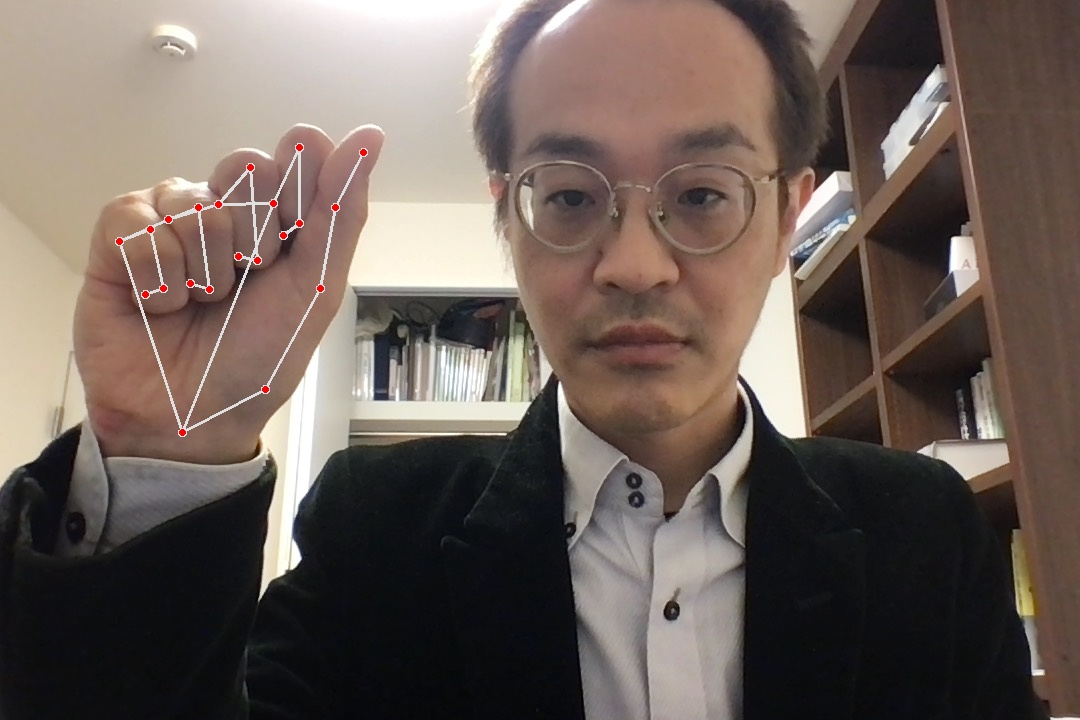

In [51]:
from IPython.display import Image
import cv2
import mediapipe as mp
import numpy as np
import os

# Google Colabでのファイルアップロード関数の代わりに、直接ファイルパスを指定
# files = files.upload()  # この行を削除
file_name = "trainimgdata/rock/001.jpg"  # 例として、以前処理したファイルのひとつを使用

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
holistic = mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5)

img = cv2.imread(file_name)
result = holistic.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 右手が検出されたか確認
if result.right_hand_landmarks:
    handpose = np.array([])
    for tmp in result.right_hand_landmarks.landmark:
        handpose = np.append(handpose, tmp.x)
        handpose = np.append(handpose, tmp.y)
        handpose = np.append(handpose, tmp.z)

    # 特徴量の表示
    outputfilename = 'tmp.jpg'  # 出力ファイルパスを変更（現在の作業ディレクトリに保存）
    annotated_image = img.copy()
    mp_drawing.draw_landmarks(annotated_image, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    cv2.imwrite(outputfilename, annotated_image)

    # モデルによる予測
    # model変数が定義されていないので、以下の行はコメントアウト
    # y_res = model.predict([handpose])
    # result_label = le.inverse_transform(y_res)[0]
    # 
    # print('----------------------------------')
    # print('Recognition Result')
    # print(result_label)
    
    print("右手のランドマークを検出しました。")
    print(f"特徴量の長さ: {handpose.shape}")
    
    # 画像表示（IPython環境の場合）
    try:
        from IPython.display import Image
        display(Image(outputfilename, format='jpg'))
    except:
        print(f"画像を {outputfilename} に保存しました。")
else:
    print("右手が検出されませんでした。")

In [52]:
handpose

array([ 1.69106752e-01,  6.01148307e-01, -7.40546966e-07,  2.45435327e-01,
        5.41510999e-01, -2.80663874e-02,  2.96675533e-01,  4.00365233e-01,
       -3.58137153e-02,  3.10933560e-01,  2.88030028e-01, -4.31959778e-02,
        3.36516321e-01,  2.11500958e-01, -4.09901291e-02,  2.53454953e-01,
        2.82339901e-01,  4.88665637e-06,  2.77692676e-01,  2.04636037e-01,
       -3.34423371e-02,  2.77125299e-01,  3.09918463e-01, -3.95532325e-02,
        2.62305140e-01,  3.26974839e-01, -4.03135680e-02,  2.02634692e-01,
        2.83860922e-01, -1.48714439e-03,  2.32298091e-01,  2.33175769e-01,
       -4.05194573e-02,  2.38110825e-01,  3.61386657e-01, -3.98532934e-02,
        2.20877036e-01,  3.56943697e-01, -2.99711134e-02,  1.55997768e-01,
        3.05307508e-01, -1.10429237e-02,  1.83704078e-01,  2.88744330e-01,
       -5.37664257e-02,  1.94184750e-01,  4.01617467e-01, -3.70881483e-02,
        1.76303521e-01,  3.93258780e-01, -1.65913682e-02,  1.11042351e-01,
        3.35315466e-01, -